<h1 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
Descriptive Statistics
</font>
</h1>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import statistics as st
from itertools import combinations
import seaborn as sns

In [3]:
coinhis=pd.read_csv(r"D:\Sharif University of Tech\Term 6\Regression Analysis\Project\Web_Scraping\Part_2_data\HistoricalDataProcessed (4).csv")
coin=pd.read_csv(r"D:\Sharif University of Tech\Term 6\Regression Analysis\Project\Web_Scraping\Part_1_data\NewCoinMarketCapNormalised.csv")

In [4]:
coinhis['Price change']=coinhis['close']-coinhis['open']

Lets start some general analysis and then some hypo test

16 top coins marketCap corr matrix

Considering that a corr matrix is always symmetric:

In [5]:
coinhis['Date'] = pd.to_datetime(coinhis['Date'])
df = coinhis.loc[(coinhis['Date'] == '2023-08-31')]
df

,Name,timeOpen,timeClose,timeHigh,timeLow,open,high,low,close,volume,marketCap,DailyPrice,CirculatingSupply,Date,DailyChange,ChangeStatus,Price change
0,Synthetix,2023-08-31T00:00:00.000Z,"""2023-08-31T23:59:59.999Z""","""2023-08-31T12:57:00.000Z""","""2023-08-31T22:14:00.000Z""",1.995606,2.024014,1.923429,1.928386,43897748.10,5.196819e+08,1.928386,2.694905e+08,2023-08-31,-0.067185,Red,-0.067220
364,Decentraland,2023-08-31T00:00:00.000Z,"""2023-08-31T23:59:59.999Z""","""2023-08-31T11:46:00.000Z""","""2023-08-31T17:22:00.000Z""",0.305262,0.306325,0.291472,0.294341,51834017.79,5.572150e+08,0.294341,1.893095e+09,2023-08-31,-0.010954,Red,-0.010922
728,Bitcoin SV,2023-08-31T00:00:00.000Z,"""2023-08-31T23:59:59.999Z""","""2023-08-31T11:46:00.000Z""","""2023-08-31T21:49:00.000Z""",32.632166,33.157780,31.192009,31.228951,25036150.71,6.016594e+08,31.228951,1.926608e+07,2023-08-31,-1.400174,Red,-1.403215
1092,Fantom,2023-08-31T00:00:00.000Z,"""2023-08-31T23:59:59.999Z""","""2023-08-31T11:49:00.000Z""","""2023-08-31T23:59:00.000Z""",0.211612,0.215447,0.200656,0.200656,58585474.25,5.624983e+08,0.200656,2.803299e+09,2023-08-31,-0.010947,Red,-0.010956
1456,Injective,2023-08-31T00:00:00.000Z,"""2023-08-31T23:59:59.999Z""","""2023-08-31T11:49:00.000Z""","""2023-08-31T21:10:00.000Z""",7.115680,7.304817,6.932920,6.992265,30878678.19,5.856410e+08,6.992265,8.375556e+07,2023-08-31,-0.123154,Red,-0.123415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68510,THORChain,2023-08-31T00:00:00.000Z,"""2023-08-31T23:59:59.999Z""","""2023-08-31T11:49:00.000Z""","""2023-08-31T21:10:00.000Z""",1.538024,1.575074,1.475128,1.499054,45611916.85,5.104323e+08,1.499054,3.405029e+08,2023-08-31,-0.039015,Red,-0.038970
68874,Neo,2023-08-31T00:00:00.000Z,"""2023-08-31T23:59:59.999Z""","""2023-08-31T11:46:00.000Z""","""2023-08-31T21:16:00.000Z""",7.394273,7.420982,7.014252,7.068067,22764178.41,4.985732e+08,7.068067,7.053883e+07,2023-08-31,-0.326031,Red,-0.326206
69238,Pax Dollar,2023-08-31T00:00:00.000Z,"""2023-08-31T23:59:59.999Z""","""2023-08-31T11:48:00.000Z""","""2023-08-31T21:10:00.000Z""",1.000089,1.001613,0.991954,0.993349,2093422.07,5.018111e+08,0.993349,5.051708e+08,2023-08-31,-0.006734,Red,-0.006740
69602,ApeCoin,2023-08-31T00:00:00.000Z,"""2023-08-31T23:59:59.999Z""","""2023-08-31T12:57:00.000Z""","""2023-08-31T21:10:00.000Z""",1.474276,1.497287,1.418550,1.429133,39179348.73,5.267694e+08,1.429133,3.685937e+08,2023-08-31,-0.045130,Red,-0.045143


In [12]:
df = df.sort_values(['marketCap'], ascending=False).head(16)
names = df['Name'].to_list()

In [13]:
H=dict()
for i in l:
    c=np.array(coinhis[coinhis['Name']==i]['Price change'].values)
    delta=c[1:]-c[:len(c)-1]
    H[i]=delta
data=pd.DataFrame(H)
data

,Bitcoin,Ethereum,Tether USDt,BNB,XRP,USD Coin,Dogecoin,Cardano,Solana,TRON,Toncoin,Dai,Polkadot,Polygon,Litecoin,Shiba Inu
0,941.637738,35.160900,0.000229,4.150065,0.005546,0.000125,0.001499,0.003492,0.151621,-0.002788,-0.031736,0.000240,0.129789,0.007407,2.475911,-3.296138e-08
1,2053.725863,102.015872,0.000673,11.212087,0.028664,-0.000023,0.003512,0.011838,2.171020,0.002660,0.211199,0.000199,0.203799,0.049649,4.584256,3.497615e-07
2,-1608.372056,-82.433835,-0.000896,-7.781052,-0.017405,-0.000190,-0.002692,-0.001046,-1.453760,-0.002084,-0.211950,-0.000115,0.047129,-0.025287,-3.176024,4.629820e-08
3,64.916550,16.223514,0.000186,1.627739,0.000952,0.000098,0.000040,-0.001491,0.736002,0.001217,0.051264,0.000195,-0.125719,0.001804,0.182020,-2.334059e-07
4,-120.224251,-17.861492,0.000057,-3.955616,-0.003108,-0.000084,-0.000521,-0.002613,-0.618689,0.000144,-0.007896,-0.000602,0.029836,-0.005944,-0.458888,-1.280860e-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358,-1432.696906,-124.491268,-0.000076,-30.232152,-0.025969,-0.000210,-0.005907,-0.052297,-3.134947,-0.003257,-0.216311,-0.003330,-0.808451,-0.084949,-9.214203,-8.590472e-07
359,803.638014,94.790820,-0.000046,11.914905,0.011921,-0.000218,0.003275,0.031979,1.394549,0.001632,0.226641,0.001505,0.479751,0.049819,5.615697,3.780099e-07
360,330.660883,-18.553437,0.000009,3.228495,0.000679,0.000230,0.001022,0.026759,0.911394,0.000962,-0.208413,0.000147,0.093115,0.017887,1.243149,7.437003e-07
361,-291.873161,-41.086818,-0.000001,-0.715452,-0.003135,0.000003,0.000535,0.003141,-1.116727,0.000122,-0.008983,0.000032,-0.101857,0.012273,-1.660826,-3.837693e-07


<Axes: title={'center': 'Correlation Matrix for DailyPriceChange in top 16 Coins from marketCap view'}>

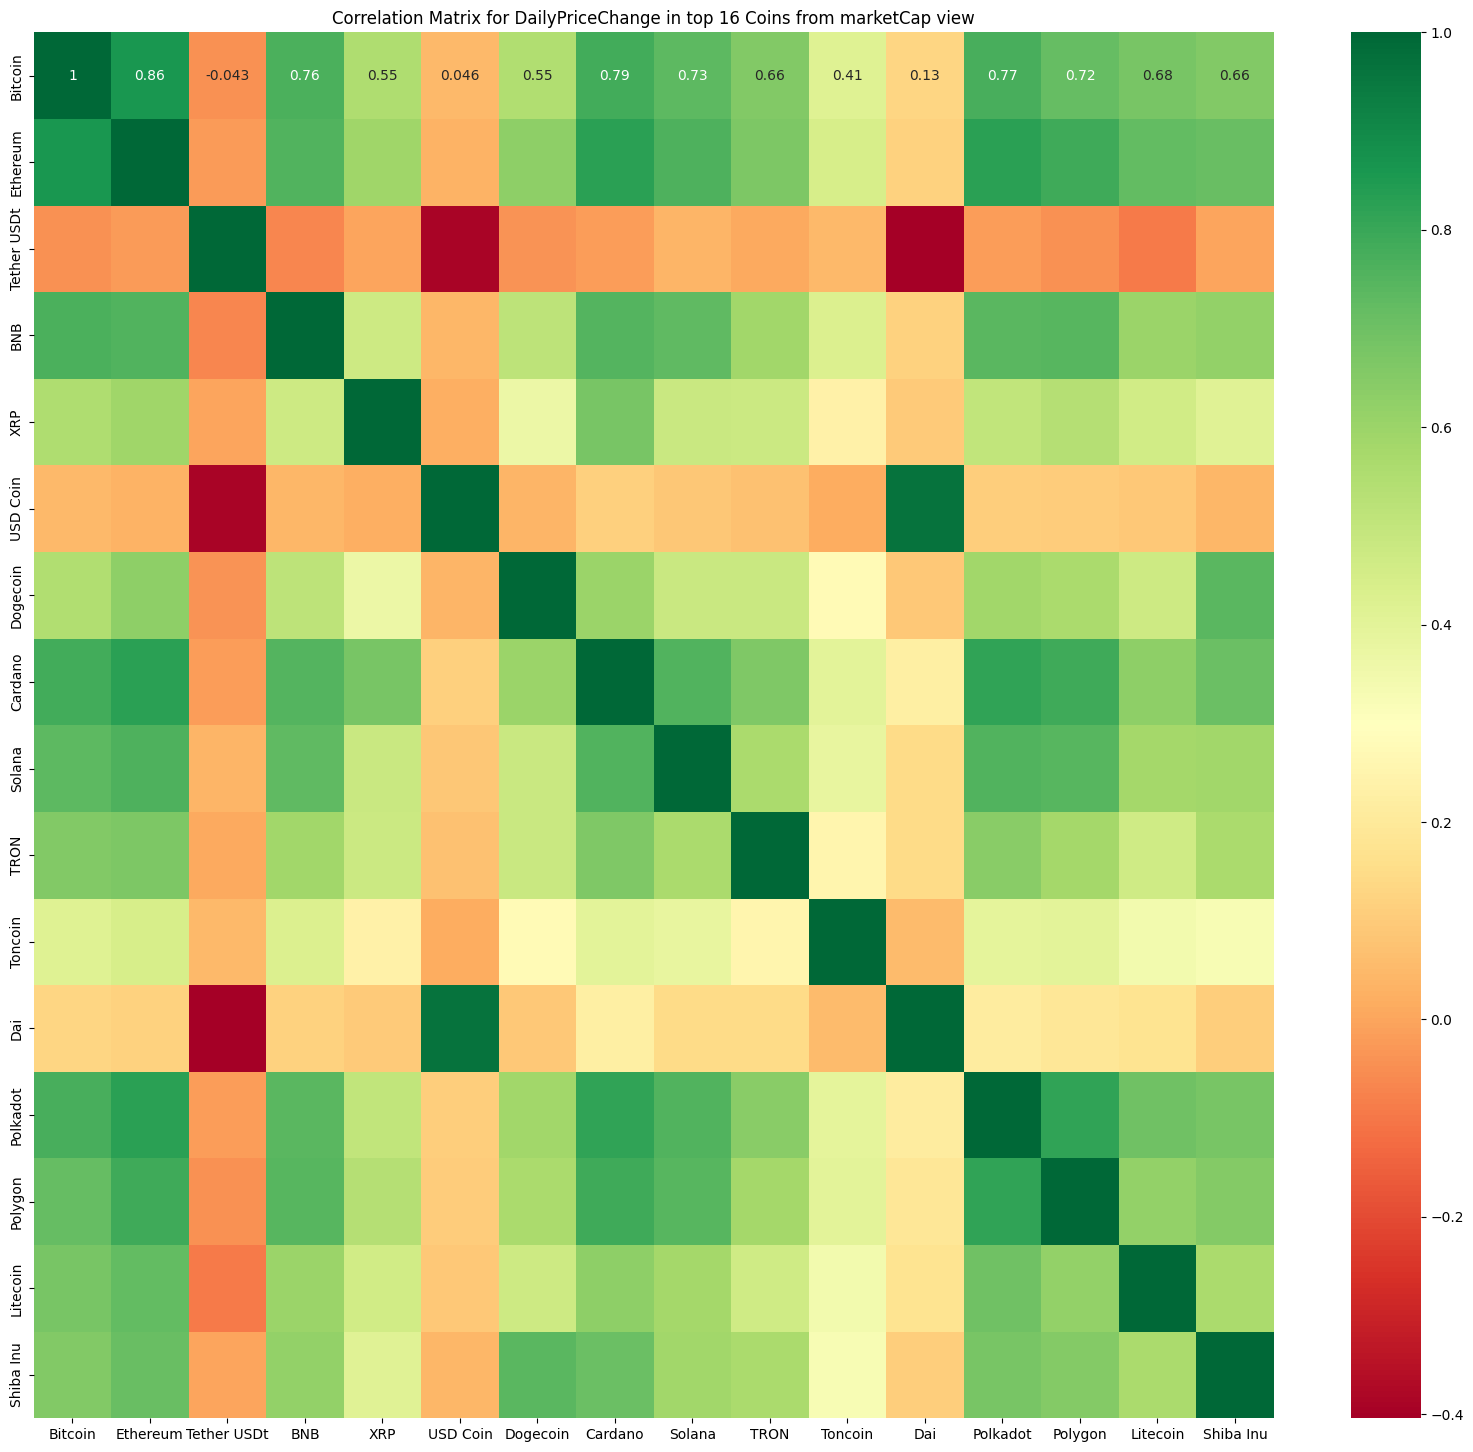

In [14]:
f, AX_1= plt.subplots(figsize=(20,18))
AX_1.set_title('Correlation Matrix for DailyPriceChange in top 16 Coins from marketCap view')
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',ax=AX_1)

# Estimation

In [16]:
sample=np.random.choice(names,size=40)
sample_mean=[]
sample_std=[]
for i in sample:
    sample_mean.append(np.mean(coinhis[coinhis['Name']==i]['volume']))
    sample_std.append(np.std(coinhis[coinhis['Name']==i]['volume']))


In [17]:
sample

array(['Toncoin', 'Dai', 'Polygon', 'XRP', 'Tether USDt', 'Tether USDt',
       'Dai', 'Polkadot', 'Dogecoin', 'USD Coin', 'Shiba Inu', 'Dai',
       'XRP', 'TRON', 'Bitcoin', 'Polygon', 'Shiba Inu', 'Polkadot',
       'Ethereum', 'Cardano', 'Polkadot', 'Dai', 'Polkadot', 'Polkadot',
       'Dogecoin', 'Polygon', 'Tether USDt', 'BNB', 'Polygon', 'BNB',
       'Bitcoin', 'TRON', 'BNB', 'XRP', 'Tether USDt', 'BNB', 'Ethereum',
       'Cardano', 'Litecoin', 'Ethereum'], dtype='<U11')

In [19]:
lower=[]
upper=[]
for i,j in enumerate(sample):
    t_score = sp.stats.t.ppf((1 + 0.98) / 2, df=sum(coinhis['Name']==j)- 1)
    margin_of_error = t_score * (sample_std[i] / np.sqrt(sum(coinhis['Name']==j)))
    lower.append( sample_mean[i] - margin_of_error)
    upper.append (sample_mean[i] + margin_of_error)

In [20]:
for i,j in enumerate(sample):
    print(j,'will be in (',lower[i],',',upper[i],') with 98 percents confidence')

Toncoin will be in ( 22141070.151695132 , 25957337.891381793 ) with 98 percents confidence
Dai will be in ( 184295645.70550576 , 253054219.2924063 ) with 98 percents confidence
Polygon will be in ( 388873985.46783066 , 459146533.820521 ) with 98 percents confidence
XRP will be in ( 1226054763.0005548 , 1471308997.9736764 ) with 98 percents confidence
Tether USDt will be in ( 31015665888.597595 , 35387895901.27893 ) with 98 percents confidence
Tether USDt will be in ( 31015665888.597595 , 35387895901.27893 ) with 98 percents confidence
Dai will be in ( 184295645.70550576 , 253054219.2924063 ) with 98 percents confidence
Polkadot will be in ( 189512147.55259097 , 219054010.38911235 ) with 98 percents confidence
Dogecoin will be in ( 506335948.044333 , 756153241.5590186 ) with 98 percents confidence
USD Coin will be in ( 3432493381.4625926 , 3906917381.953506 ) with 98 percents confidence
Shiba Inu will be in ( 220896600.7041965 , 276148054.5809135 ) with 98 percents confidence
Dai will b

In [22]:
# Just for some reassurance!
cr = coinhis[coinhis['Name'] == 'Solana']
cr['volume'].mean(), sp.stats.norm.interval(0.98, cr['volume'].mean(), cr['volume'].std()/np.sqrt(364))

(634920293.8638736, (563413185.7449179, 706427401.9828293))

In [23]:
sample_mean = np.array(sample_mean)

In [24]:
sample_mean.mean(), sample_mean.std()

(5578053618.137709, 10586310373.062855)

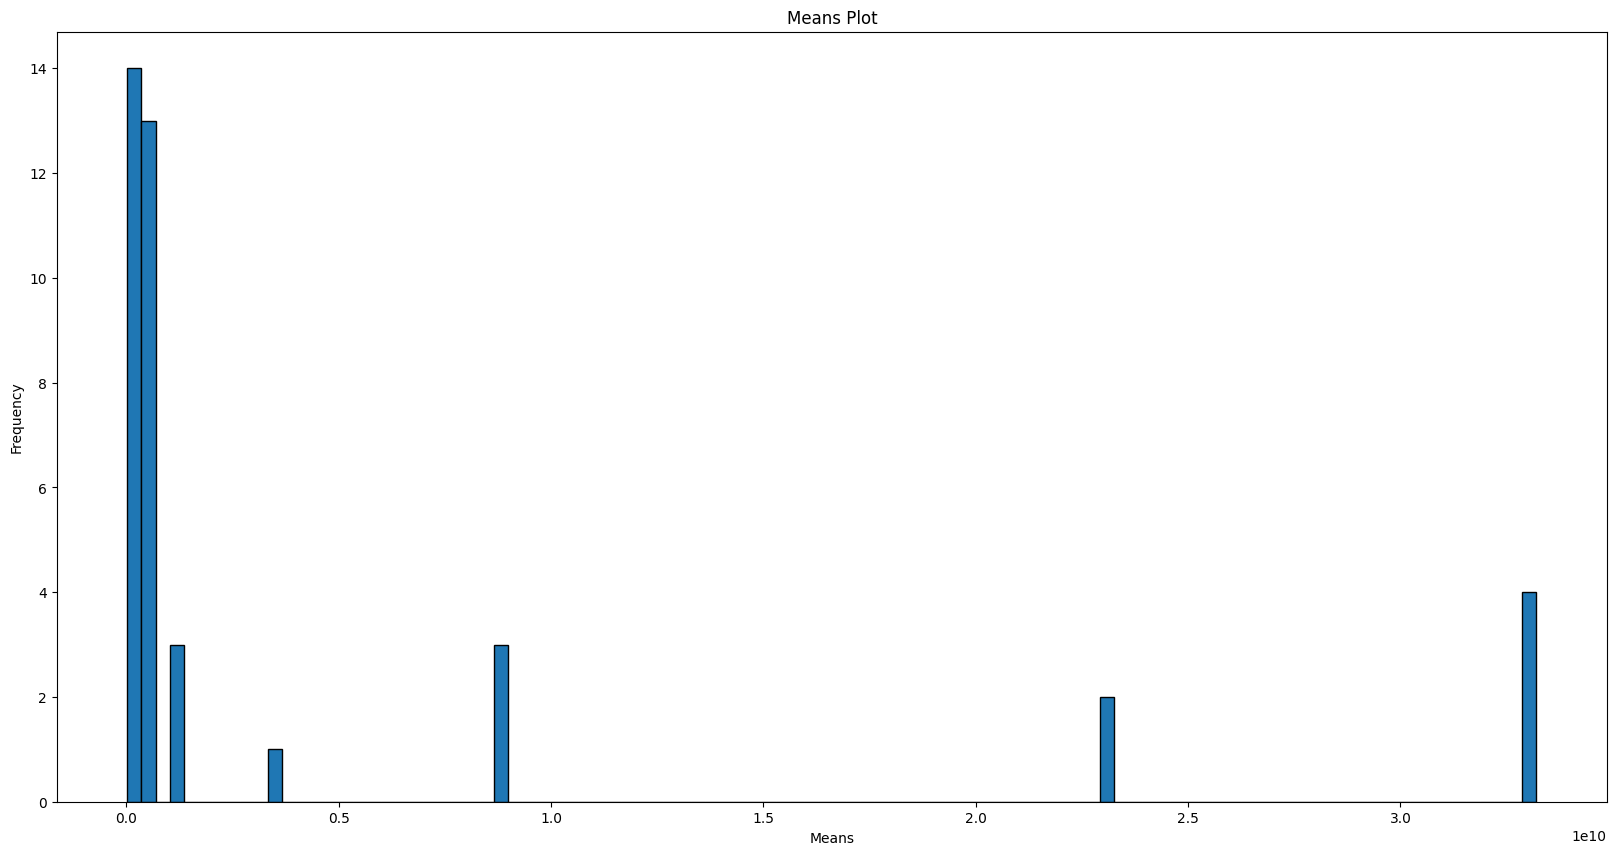

In [25]:
fig , ax = plt.subplots(figsize=(20,10))
plt.hist(sample_mean,bins = 100, edgecolor = "black", align = 'mid')
ax.set_title('Means Plot')
ax.set_xlabel('Means')
ax.set_ylabel('Frequency')
plt.show()

They are not normally distributed!

Due to CLT we expected it to be normally distributed though!

For conducting a CI we will try to make our data normal using boxcox transformation!

In [26]:
b, lmbda = sp.stats.boxcox(sample_mean)
b

array([4.97055249, 5.03732293, 5.05238711, 5.07448964, 5.11516215,
       5.11516215, 5.03732293, 5.03566176, 5.06055306, 5.08999507,
       5.04038622, 5.03732293, 5.07448964, 5.04253392, 5.11167642,
       5.05238711, 5.04038622, 5.03566176, 5.10138989, 5.04919091,
       5.03566176, 5.03732293, 5.03566176, 5.03566176, 5.06055306,
       5.05238711, 5.11516215, 5.06206288, 5.05238711, 5.06206288,
       5.11167642, 5.04253392, 5.06206288, 5.07448964, 5.11516215,
       5.06206288, 5.10138989, 5.04919091, 5.0592963 , 5.10138989])

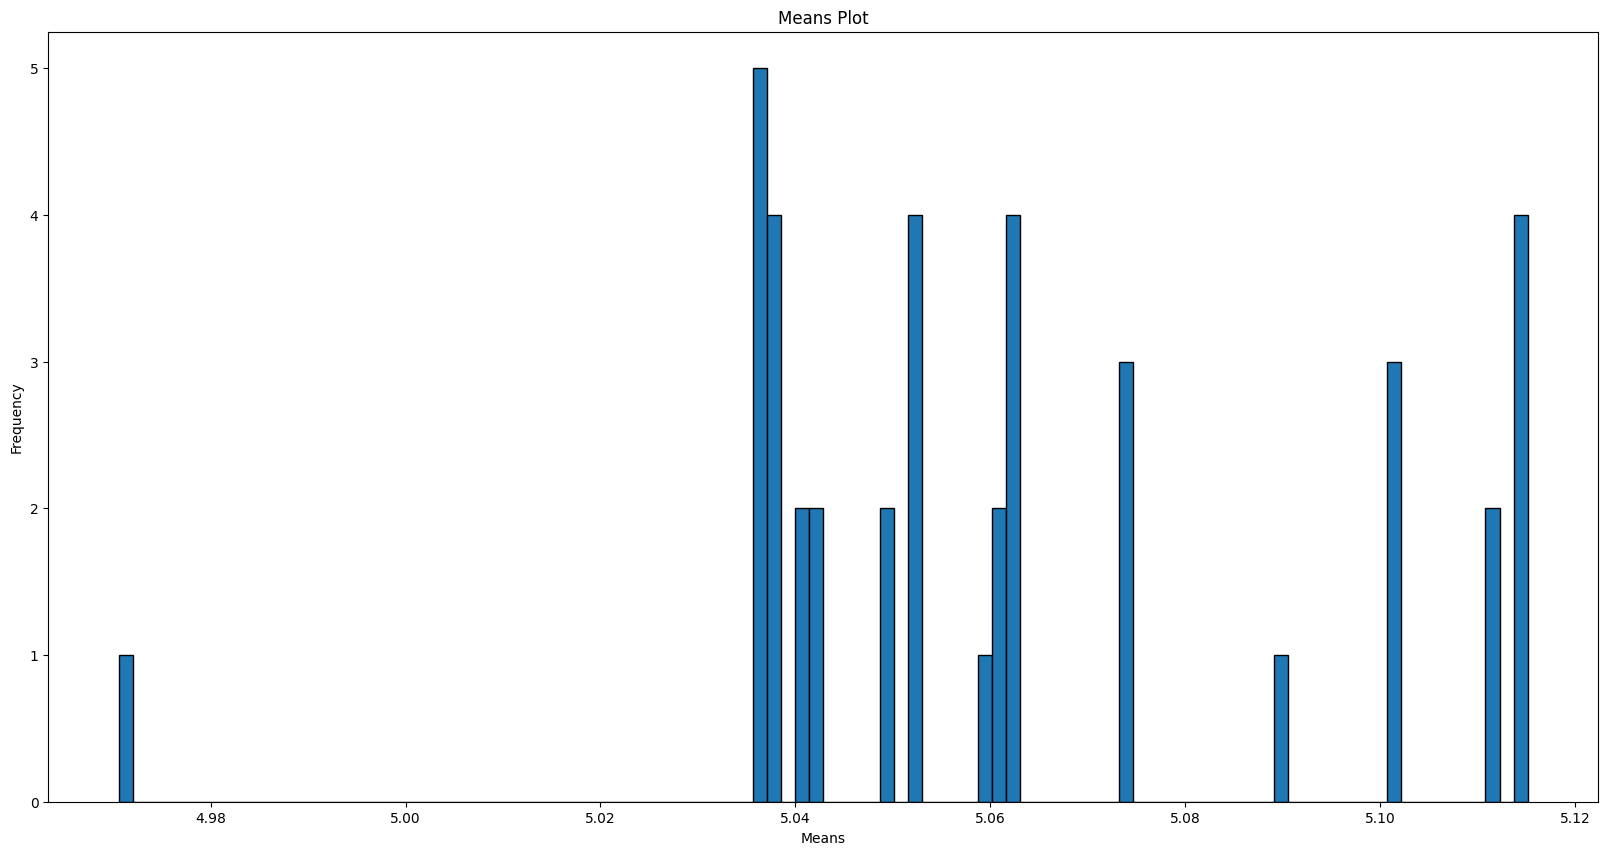

In [27]:
fig , ax = plt.subplots(figsize=(20,10))
plt.hist(b,bins = 100, edgecolor = "black", align = 'mid')
ax.set_title('Means Plot')
ax.set_xlabel('Means')
ax.set_ylabel('Frequency')
plt.show()

Testing normality:

In [28]:
from scipy.stats import shapiro
stat, p = shapiro(b)
p

0.001074650208465755

We can confidently say that our transformed data is normal!

In [29]:
b

array([4.97055249, 5.03732293, 5.05238711, 5.07448964, 5.11516215,
       5.11516215, 5.03732293, 5.03566176, 5.06055306, 5.08999507,
       5.04038622, 5.03732293, 5.07448964, 5.04253392, 5.11167642,
       5.05238711, 5.04038622, 5.03566176, 5.10138989, 5.04919091,
       5.03566176, 5.03732293, 5.03566176, 5.03566176, 5.06055306,
       5.05238711, 5.11516215, 5.06206288, 5.05238711, 5.06206288,
       5.11167642, 5.04253392, 5.06206288, 5.07448964, 5.11516215,
       5.06206288, 5.10138989, 5.04919091, 5.0592963 , 5.10138989])

In [30]:
interval = sp.stats.norm.interval(0.98, loc = b.mean(), scale = b.std())
interval

(4.990098958645662, 5.1350116702908295)

98% of our data in a transformed way must be in the given interval!

We can say, to calculate a confidence interval of 98% we should transform our data to a normal one.

Then we will use the transformed data to calculate the interval and given the current data, our interval would be as shown.

# Hypothesis Test One

In [31]:
coinhis['weekday'] = coinhis['Date'].dt.day_name()
coinhis

,Name,timeOpen,timeClose,timeHigh,timeLow,open,high,low,close,volume,marketCap,DailyPrice,CirculatingSupply,Date,DailyChange,ChangeStatus,Price change,weekday
0,Synthetix,2023-08-31T00:00:00.000Z,"""2023-08-31T23:59:59.999Z""","""2023-08-31T12:57:00.000Z""","""2023-08-31T22:14:00.000Z""",1.995606,2.024014,1.923429,1.928386,43897748.10,5.196819e+08,1.928386,2.694905e+08,2023-08-31,-0.067185,Red,-0.067220,Thursday
1,Synthetix,2023-08-30T00:00:00.000Z,"""2023-08-30T23:59:59.999Z""","""2023-08-30T00:55:00.000Z""","""2023-08-30T23:59:00.000Z""",2.060952,2.084899,1.995572,1.995572,31366413.98,5.372710e+08,1.995572,2.692316e+08,2023-08-30,-0.065396,Red,-0.065380,Wednesday
2,Synthetix,2023-08-29T00:00:00.000Z,"""2023-08-29T23:59:59.999Z""","""2023-08-29T14:46:00.000Z""","""2023-08-29T10:40:00.000Z""",2.080947,2.137082,2.037481,2.060968,45715402.91,5.548779e+08,2.060968,2.692317e+08,2023-08-29,-0.020060,Red,-0.019979,Tuesday
3,Synthetix,2023-08-28T00:00:00.000Z,"""2023-08-28T23:59:59.999Z""","""2023-08-28T12:36:00.000Z""","""2023-08-28T21:46:00.000Z""",2.107940,2.139597,2.079478,2.081028,23323525.55,5.600492e+08,2.081028,2.691214e+08,2023-08-28,-0.026909,Red,-0.026912,Monday
4,Synthetix,2023-08-27T00:00:00.000Z,"""2023-08-27T23:59:59.999Z""","""2023-08-27T16:44:00.000Z""","""2023-08-27T00:00:00.000Z""",2.071464,2.148910,2.071464,2.107937,21101866.70,5.672910e+08,2.107937,2.691214e+08,2023-08-27,0.036344,Green,0.036474,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70325,Render,2022-09-06T00:00:00.000Z,"""2022-09-06T23:59:59.999Z""","""2022-09-06T12:28:00.000Z""","""2022-09-06T20:13:00.000Z""",0.500139,0.507269,0.469257,0.469789,9924323.73,1.192319e+08,0.469789,2.537989e+08,2022-09-06,-0.030430,Red,-0.030350,Tuesday
70326,Render,2022-09-05T00:00:00.000Z,"""2022-09-05T23:59:59.999Z""","""2022-09-05T00:07:00.000Z""","""2022-09-05T10:49:00.000Z""",0.516513,0.520092,0.484872,0.500218,10377458.01,1.269549e+08,0.500218,2.537989e+08,2022-09-05,-0.016286,Red,-0.016295,Monday
70327,Render,2022-09-04T00:00:00.000Z,"""2022-09-04T23:59:59.999Z""","""2022-09-04T13:07:00.000Z""","""2022-09-04T08:08:00.000Z""",0.509291,0.518565,0.497843,0.516505,4796503.94,1.310884e+08,0.516505,2.537989e+08,2022-09-04,0.007291,Green,0.007214,Sunday
70328,Render,2022-09-03T00:00:00.000Z,"""2022-09-03T23:59:59.999Z""","""2022-09-03T00:50:00.000Z""","""2022-09-03T07:55:00.000Z""",0.520313,0.521055,0.501718,0.509214,4426976.60,1.292380e+08,0.509214,2.537989e+08,2022-09-03,-0.011092,Red,-0.011098,Saturday


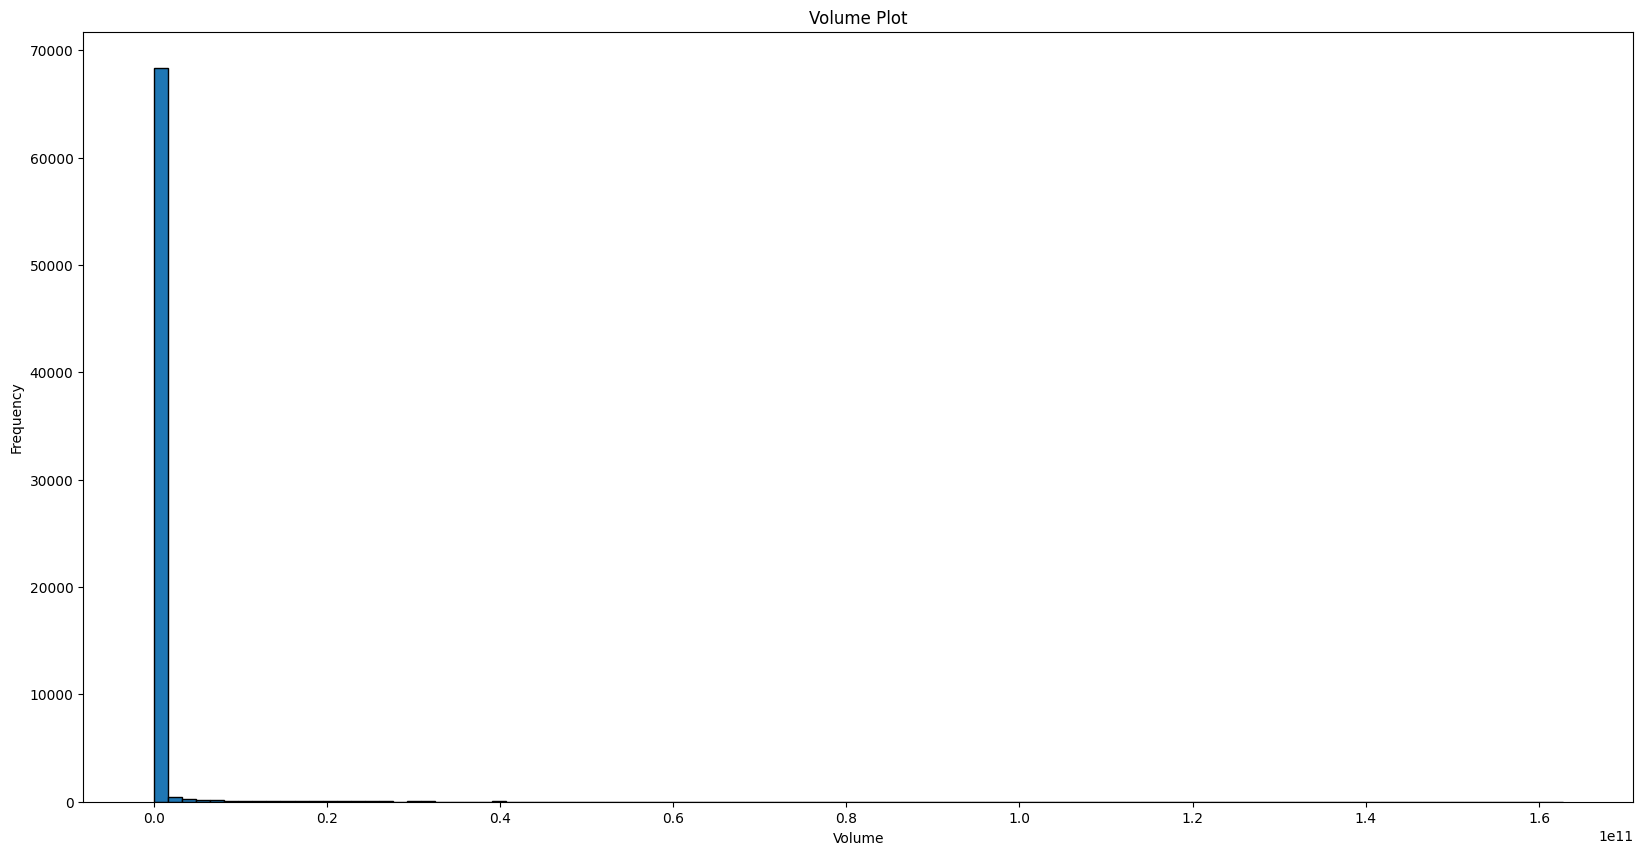

In [32]:
fig , ax = plt.subplots(figsize=(20,10))
plt.hist(coinhis['volume'],bins = 100, edgecolor = "black", align = 'mid')
ax.set_title('Volume Plot')
ax.set_xlabel('Volume')
ax.set_ylabel('Frequency')
plt.show()

Volume is not normal therefore no T-test!

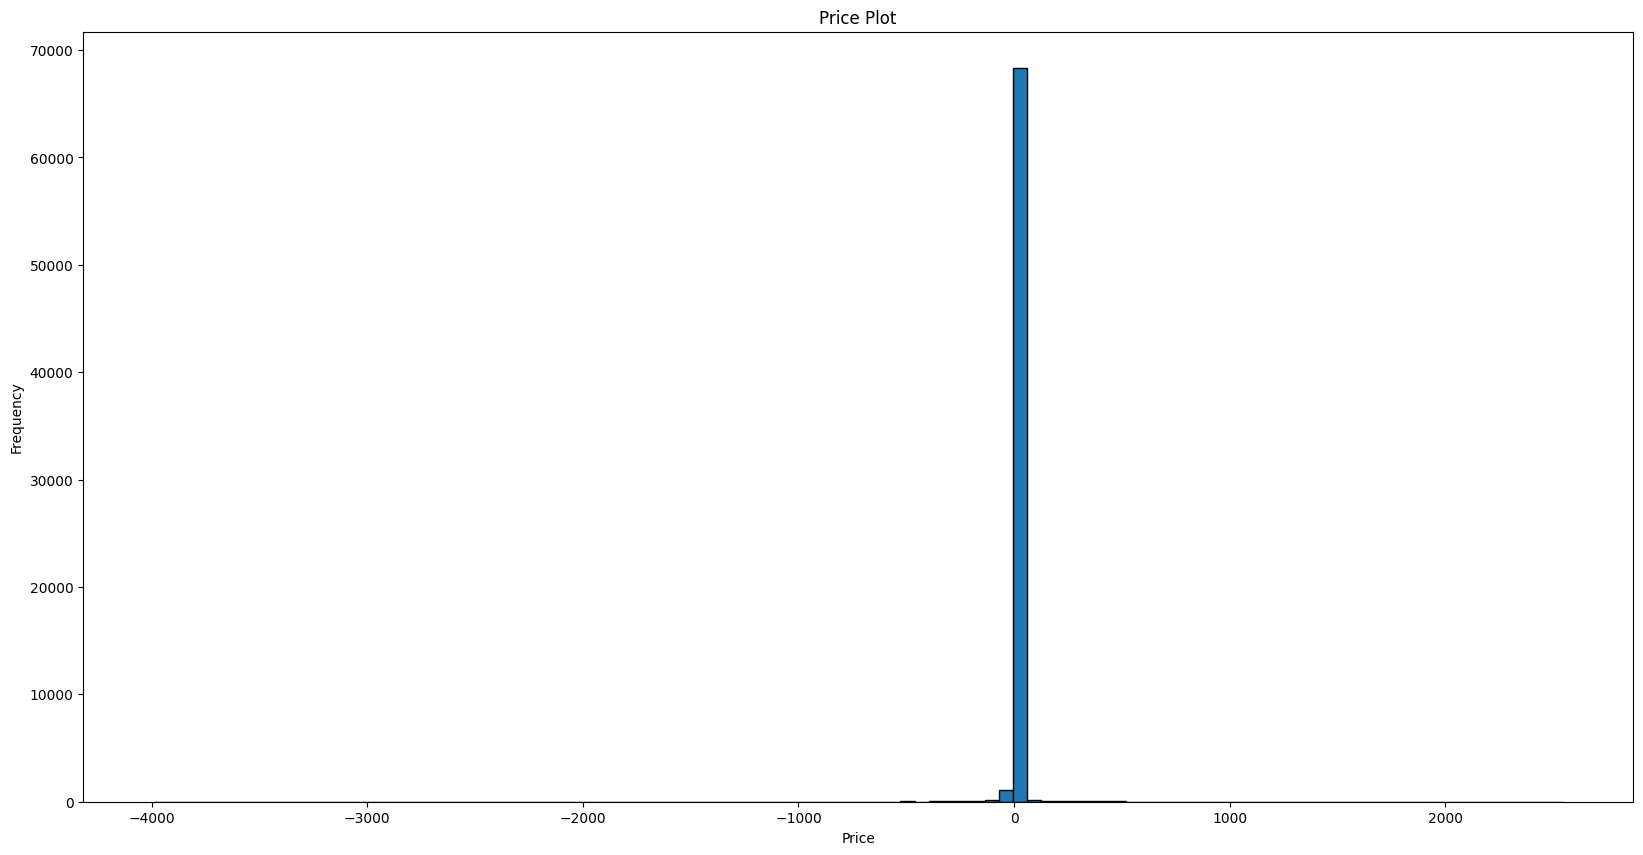

In [33]:
fig , ax = plt.subplots(figsize=(20,10))
plt.hist(coinhis['Price change'],bins = 100, edgecolor = "black", align = 'mid')
ax.set_title('Price Plot')
ax.set_xlabel('Price')
ax.set_ylabel('Frequency')
plt.show()

In [34]:
sp.stats.kurtosis(coinhis['Price change'], bias=True)

650.0690829565641

The 3+ kurtosis states that our data is not normal and it's a leptokurtic distributed data, but due to being normal-like, T-testing would be available.

In [35]:
from scipy.stats import shapiro
stat, p = shapiro(coinhis['Price change'])
p

d:\Sharif University of Tech\Data\.venv\lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


0.0

There is no way that this is a normally distributed data!

In [36]:
weekends = coinhis[(coinhis['weekday']=='Thursday') | (coinhis['weekday']=='Friday') | (coinhis['weekday']=='Saturday')]
weekends

,Name,timeOpen,timeClose,timeHigh,timeLow,open,high,low,close,volume,marketCap,DailyPrice,CirculatingSupply,Date,DailyChange,ChangeStatus,Price change,weekday
0,Synthetix,2023-08-31T00:00:00.000Z,"""2023-08-31T23:59:59.999Z""","""2023-08-31T12:57:00.000Z""","""2023-08-31T22:14:00.000Z""",1.995606,2.024014,1.923429,1.928386,43897748.10,5.196819e+08,1.928386,2.694905e+08,2023-08-31,-0.067185,Red,-0.067220,Thursday
5,Synthetix,2023-08-26T00:00:00.000Z,"""2023-08-26T23:59:59.999Z""","""2023-08-26T15:06:00.000Z""","""2023-08-26T00:55:00.000Z""",2.062422,2.082831,2.052110,2.071593,14078802.77,5.575099e+08,2.071593,2.691214e+08,2023-08-26,0.009235,Green,0.009171,Saturday
6,Synthetix,2023-08-25T00:00:00.000Z,"""2023-08-25T23:59:59.999Z""","""2023-08-25T00:22:00.000Z""","""2023-08-25T17:49:00.000Z""",2.074432,2.075322,2.020174,2.062358,32694877.37,5.550245e+08,2.062358,2.691214e+08,2023-08-25,-0.012086,Red,-0.012074,Friday
7,Synthetix,2023-08-24T00:00:00.000Z,"""2023-08-24T23:59:59.999Z""","""2023-08-24T07:25:00.000Z""","""2023-08-24T21:00:00.000Z""",2.138407,2.147887,2.046853,2.074444,26242380.14,5.582767e+08,2.074444,2.691211e+08,2023-08-24,-0.063833,Red,-0.063963,Thursday
12,Synthetix,2023-08-19T00:00:00.000Z,"""2023-08-19T23:59:59.999Z""","""2023-08-19T17:06:00.000Z""","""2023-08-19T07:12:00.000Z""",2.181628,2.245445,2.171883,2.240552,17961041.91,6.025954e+08,2.240552,2.689495e+08,2023-08-19,0.059077,Green,0.058925,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70321,Render,2022-09-10T00:00:00.000Z,"""2022-09-10T23:59:59.999Z""","""2022-09-10T08:04:00.000Z""","""2022-09-10T01:09:00.000Z""",0.564239,0.627566,0.560060,0.582239,24590018.45,1.477717e+08,0.582239,2.537989e+08,2022-09-10,0.017970,Green,0.018001,Saturday
70322,Render,2022-09-09T00:00:00.000Z,"""2022-09-09T23:59:59.999Z""","""2022-09-09T12:43:00.000Z""","""2022-09-09T07:44:00.000Z""",0.550511,0.569030,0.535818,0.564269,19865815.36,1.432109e+08,0.564269,2.537989e+08,2022-09-09,0.013396,Green,0.013758,Friday
70323,Render,2022-09-08T00:00:00.000Z,"""2022-09-08T23:59:59.999Z""","""2022-09-08T18:05:00.000Z""","""2022-09-08T13:13:00.000Z""",0.507117,0.622047,0.491250,0.550873,44263475.68,1.398110e+08,0.550873,2.537989e+08,2022-09-08,0.043774,Green,0.043756,Thursday
70328,Render,2022-09-03T00:00:00.000Z,"""2022-09-03T23:59:59.999Z""","""2022-09-03T00:50:00.000Z""","""2022-09-03T07:55:00.000Z""",0.520313,0.521055,0.501718,0.509214,4426976.60,1.292380e+08,0.509214,2.537989e+08,2022-09-03,-0.011092,Red,-0.011098,Saturday


In [37]:
weekdays = coinhis[(coinhis['weekday']=='Sunday') | (coinhis['weekday']=='Monday') | (coinhis['weekday']=='Tuesday')]
weekdays

,Name,timeOpen,timeClose,timeHigh,timeLow,open,high,low,close,volume,marketCap,DailyPrice,CirculatingSupply,Date,DailyChange,ChangeStatus,Price change,weekday
2,Synthetix,2023-08-29T00:00:00.000Z,"""2023-08-29T23:59:59.999Z""","""2023-08-29T14:46:00.000Z""","""2023-08-29T10:40:00.000Z""",2.080947,2.137082,2.037481,2.060968,45715402.91,5.548779e+08,2.060968,2.692317e+08,2023-08-29,-0.020060,Red,-0.019979,Tuesday
3,Synthetix,2023-08-28T00:00:00.000Z,"""2023-08-28T23:59:59.999Z""","""2023-08-28T12:36:00.000Z""","""2023-08-28T21:46:00.000Z""",2.107940,2.139597,2.079478,2.081028,23323525.55,5.600492e+08,2.081028,2.691214e+08,2023-08-28,-0.026909,Red,-0.026912,Monday
4,Synthetix,2023-08-27T00:00:00.000Z,"""2023-08-27T23:59:59.999Z""","""2023-08-27T16:44:00.000Z""","""2023-08-27T00:00:00.000Z""",2.071464,2.148910,2.071464,2.107937,21101866.70,5.672910e+08,2.107937,2.691214e+08,2023-08-27,0.036344,Green,0.036474,Sunday
9,Synthetix,2023-08-22T00:00:00.000Z,"""2023-08-22T23:59:59.999Z""","""2023-08-22T06:59:00.000Z""","""2023-08-22T21:41:00.000Z""",2.094776,2.114860,2.009591,2.067716,24249224.22,5.561540e+08,2.067716,2.689703e+08,2023-08-22,-0.027208,Red,-0.027060,Tuesday
10,Synthetix,2023-08-21T00:00:00.000Z,"""2023-08-21T23:59:59.999Z""","""2023-08-21T03:09:00.000Z""","""2023-08-21T11:13:00.000Z""",2.149067,2.150929,2.084883,2.094923,29950188.57,5.634391e+08,2.094923,2.689545e+08,2023-08-21,-0.054175,Red,-0.054144,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70319,Render,2022-09-12T00:00:00.000Z,"""2022-09-12T23:59:59.999Z""","""2022-09-12T14:08:00.000Z""","""2022-09-12T03:46:00.000Z""",0.563672,0.583103,0.540043,0.569006,12824708.29,1.444130e+08,0.569006,2.537989e+08,2022-09-12,0.005365,Green,0.005334,Monday
70320,Render,2022-09-11T00:00:00.000Z,"""2022-09-11T23:59:59.999Z""","""2022-09-11T01:13:00.000Z""","""2022-09-11T22:01:00.000Z""",0.582062,0.600198,0.553060,0.563641,13357205.24,1.430514e+08,0.563641,2.537989e+08,2022-09-11,-0.018598,Red,-0.018421,Sunday
70325,Render,2022-09-06T00:00:00.000Z,"""2022-09-06T23:59:59.999Z""","""2022-09-06T12:28:00.000Z""","""2022-09-06T20:13:00.000Z""",0.500139,0.507269,0.469257,0.469789,9924323.73,1.192319e+08,0.469789,2.537989e+08,2022-09-06,-0.030430,Red,-0.030350,Tuesday
70326,Render,2022-09-05T00:00:00.000Z,"""2022-09-05T23:59:59.999Z""","""2022-09-05T00:07:00.000Z""","""2022-09-05T10:49:00.000Z""",0.516513,0.520092,0.484872,0.500218,10377458.01,1.269549e+08,0.500218,2.537989e+08,2022-09-05,-0.016286,Red,-0.016295,Monday


Dynamism of a market is a factor of its inner daily changes or its volume in every time portion

We will test each interpretation.

Price change and Volume will be tested using a manwhitney U-test and boxcox transformation if needed.

Prices:

Floodgate through equality

x: weekends

y: weekdays

H0 : μx = μy

H1 : μx != μy 

In [38]:
from scipy.stats import mannwhitneyu
stat, p_value = mannwhitneyu(weekends['Price change'], weekdays['Price change'])
p_value

0.9006196471887044

Confidentally we can say that week days and price changes are independant and therefore there is no significant relation between them.

Volumes:

Floodgate through equality

x: weekends

y: weekdays

H0 : μx = μy

H1 : μx != μy

In [39]:
from scipy.stats import mannwhitneyu
stat, p_value = mannwhitneyu(weekends['volume'], weekdays['volume'])
p_value

0.7034330324992215

Using manwhitney U-test we can assume that week day has no direct effect on market's volume.

Hence, volume and price change has no values of induction and we can say using volume or price change, weekdays and weekends won't differ significantly in dynamicity.

We will try to make the data normal by IQR method.

In [40]:
Q1 = coinhis['Price change'].quantile(0.25)
Q3 = coinhis['Price change'].quantile(0.75)
IQR = Q3 - Q1
m = coinhis['Price change']
m = m[(m <= Q3 + IQR*1.5) & (m >= Q1 - IQR*1.5)]
m

2       -0.019979
3       -0.026912
4        0.036474
5        0.009171
6       -0.012074
           ...   
70325   -0.030350
70326   -0.016295
70327    0.007214
70328   -0.011098
70329   -0.002837
Name: Price change, Length: 47521, dtype: float64

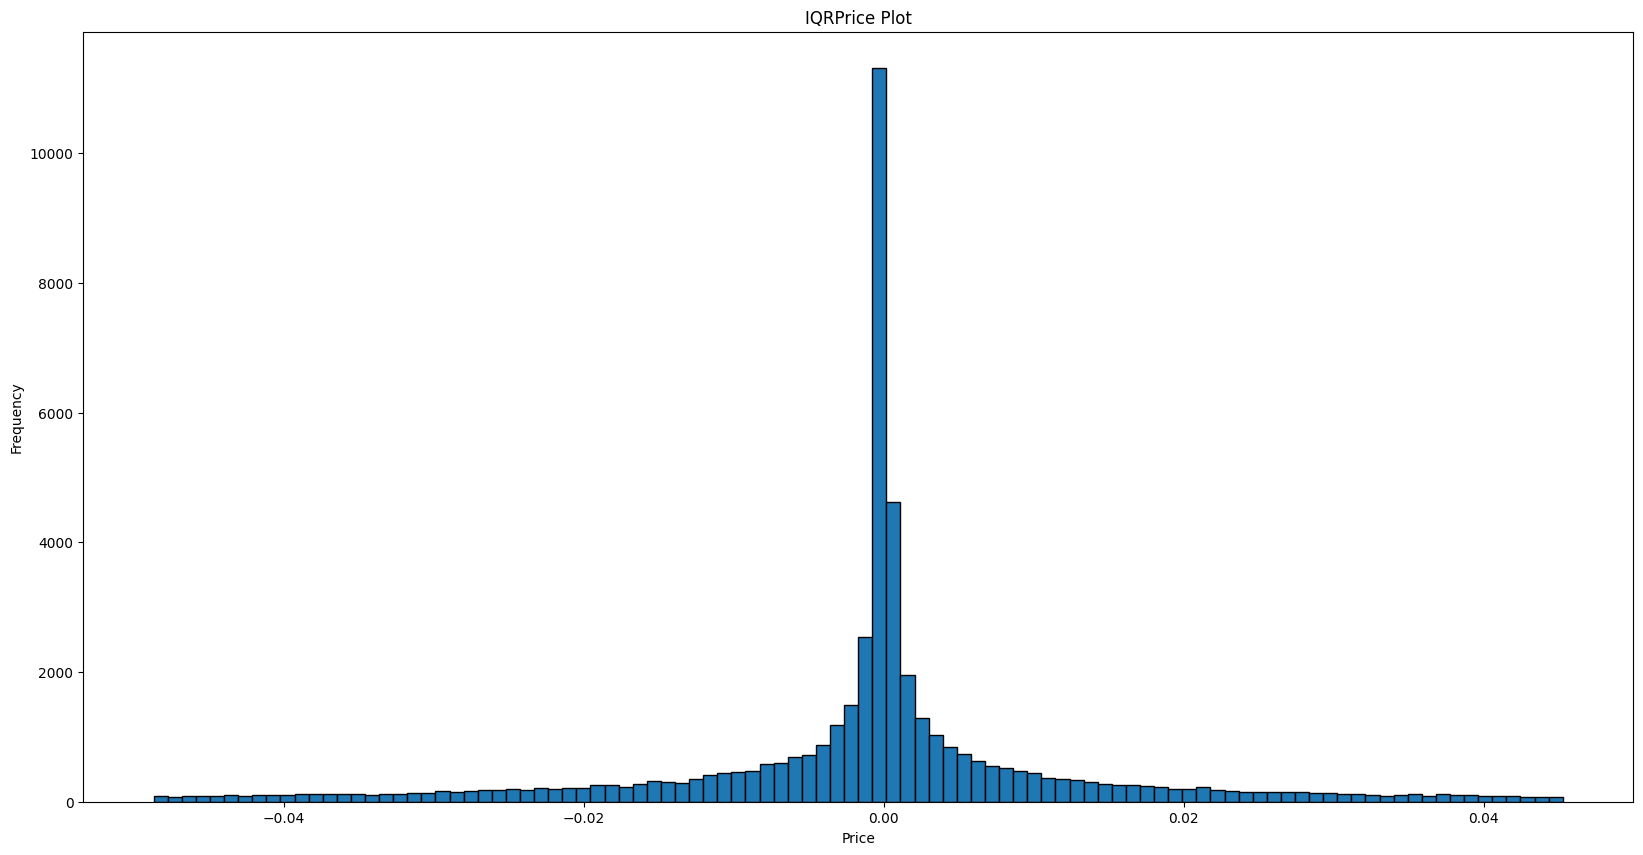

In [41]:
fig , ax = plt.subplots(figsize=(20,10))
plt.hist(m,bins = 100, edgecolor = "black", align = 'mid')
ax.set_title('IQRPrice Plot')
ax.set_xlabel('Price')
ax.set_ylabel('Frequency')
plt.show()

In [42]:
from scipy.stats import shapiro
stat, p = shapiro(m)
p

d:\Sharif University of Tech\Data\.venv\lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


0.0

Still not normal!

Trying Yeo-Johnson transformation

In [43]:
y = sp.stats.yeojohnson(m)
y

(array([-0.01946422, -0.02598544,  0.0382661 , ...,  0.0072826 ,
        -0.01093793, -0.0028266 ]),
 3.64140556673385)

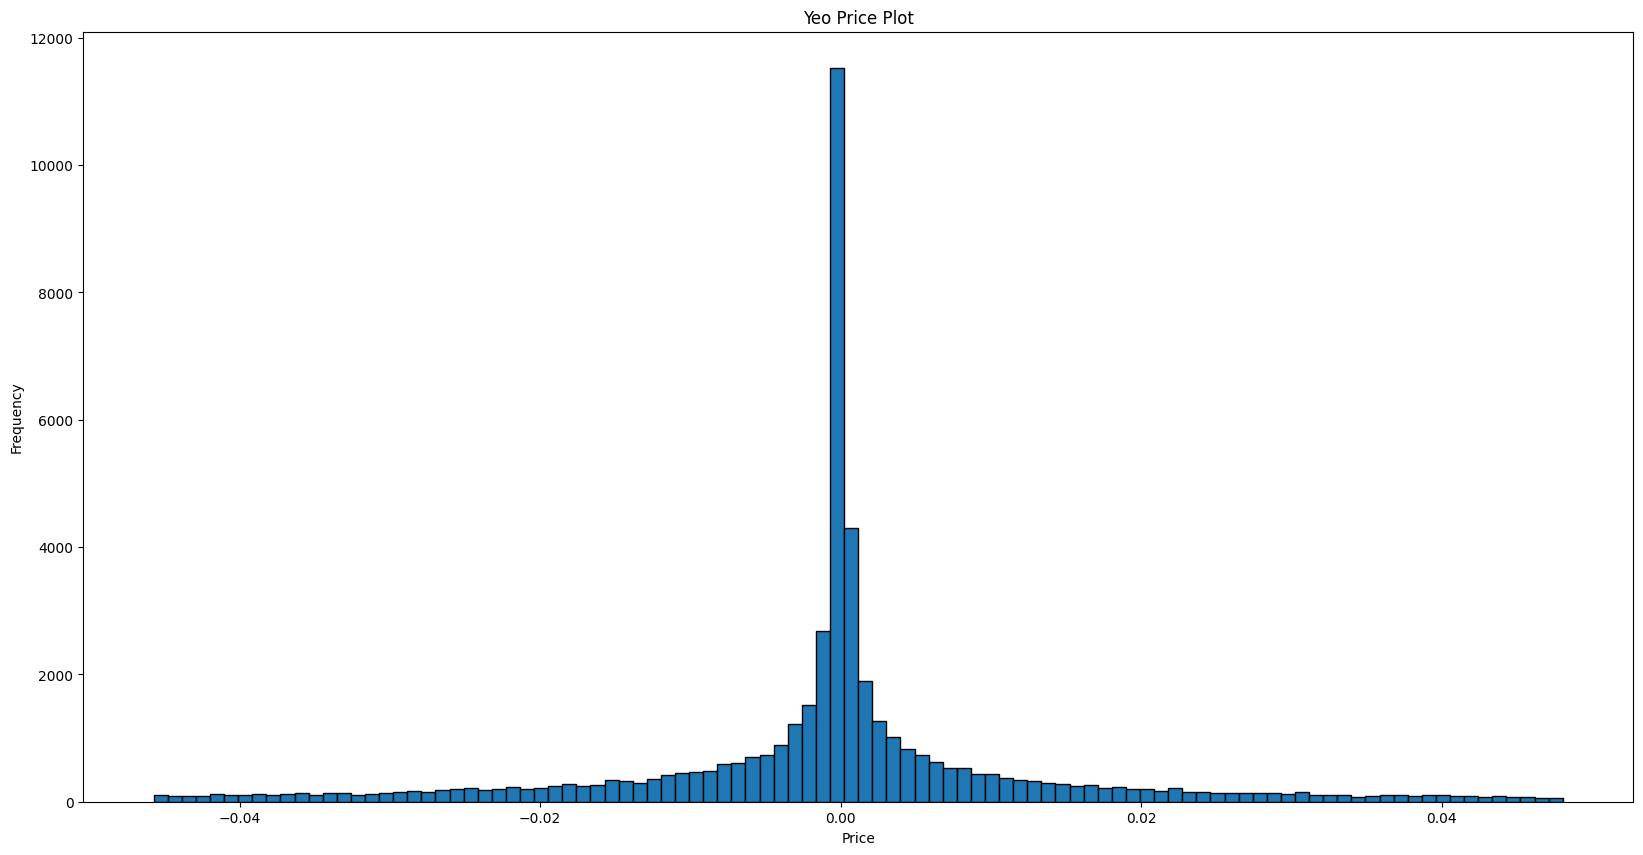

In [44]:
fig , ax = plt.subplots(figsize=(20,10))
plt.hist(y[0],bins = 100, edgecolor = "black", align = 'mid')
ax.set_title('Yeo Price Plot')
ax.set_xlabel('Price')
ax.set_ylabel('Frequency')
plt.show()

In [45]:
from scipy.stats import shapiro
stat, p = shapiro(y[0])
p

0.0

It won't be normal any way!

Any of the transformations didn't help us to make our data normal!

Trying to convert it using BoxCox, we will need a positive data.

We will try price change abs instead but due to number of zeros it won't help.

We will consider price changes as abs and run our tests again.

In [46]:
dff = coinhis[['weekday', 'Price change']]
dff['Price change'] = abs(dff['Price change'])
dff

C:\Users\Acer\AppData\Local\Temp\ipykernel_17628\497230489.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff['Price change'] = abs(dff['Price change'])


,weekday,Price change
0,Thursday,0.067220
1,Wednesday,0.065380
2,Tuesday,0.019979
3,Monday,0.026912
4,Sunday,0.036474
...,...,...
70325,Tuesday,0.030350
70326,Monday,0.016295
70327,Sunday,0.007214
70328,Saturday,0.011098


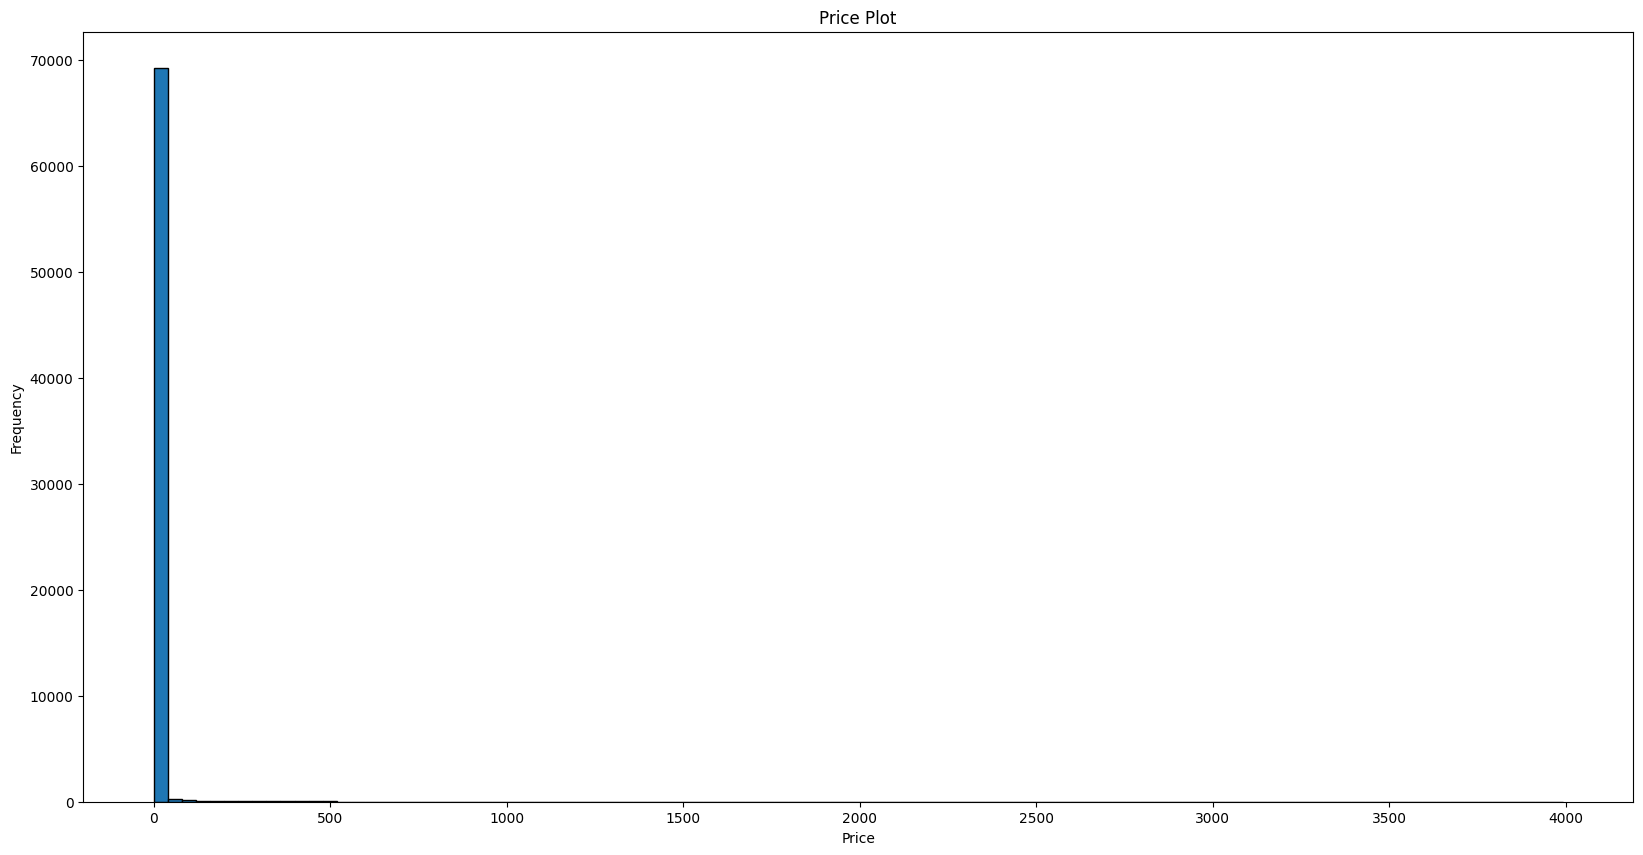

In [47]:
fig , ax = plt.subplots(figsize=(20,10))
plt.hist(dff['Price change'],bins = 100, edgecolor = "black", align = 'mid')
ax.set_title('Price Plot')
ax.set_xlabel('Price')
ax.set_ylabel('Frequency')
plt.show()

In [48]:
we = dff[(dff['weekday']=='Thursday') | (dff['weekday']=='Friday') | (dff['weekday']=='Saturday')]

In [49]:
wd = dff[(dff['weekday']=='Sunday') | (dff['weekday']=='Monday') | (dff['weekday']=='Tuesday')]

In [50]:
stat, p_value = mannwhitneyu(we['Price change'], wd['Price change'])
p_value

0.044433298009478595

If we are not being too strict in precesion, we can say price change abs can say something!

Let's dig into it:

In [51]:
cf = dff[dff['Price change']!=0]
cf

,weekday,Price change
0,Thursday,0.067220
1,Wednesday,0.065380
2,Tuesday,0.019979
3,Monday,0.026912
4,Sunday,0.036474
...,...,...
70325,Tuesday,0.030350
70326,Monday,0.016295
70327,Sunday,0.007214
70328,Saturday,0.011098


In [52]:
c, lmbda = sp.stats.boxcox(cf['Price change'])
c

array([-2.58194619, -2.60729895, -3.66876867, ..., -4.54797351,
       -4.17977393, -5.32757179])

In [53]:
cf = pd.concat([cf,pd.DataFrame(c)], axis =1)
cf = cf.rename(columns={0:'BC'})
cf

,weekday,Price change,BC
0,Thursday,0.067220,-2.581946
1,Wednesday,0.065380,-2.607299
2,Tuesday,0.019979,-3.668769
3,Monday,0.026912,-3.405990
4,Sunday,0.036474,-3.135080
...,...,...,...
70325,Tuesday,0.030350,-3.299172
70326,Monday,0.016295,-3.847092
70327,Sunday,0.007214,-4.547974
70328,Saturday,0.011098,-4.179774


In [54]:
cf = cf[:70258]
cf

,weekday,Price change,BC
0,Thursday,0.067220,-2.581946
1,Wednesday,0.065380,-2.607299
2,Tuesday,0.019979,-3.668769
3,Monday,0.026912,-3.405990
4,Sunday,0.036474,-3.135080
...,...,...,...
70253,Thursday,0.003335,-5.194165
70254,Wednesday,0.014206,-3.966395
70255,Tuesday,0.010036,-4.266232
70256,Monday,0.023252,-3.535259


In [55]:
we = cf[(cf['weekday']=='Thursday') | (cf['weekday']=='Friday') | (cf['weekday']=='Saturday')]

In [56]:
wd = cf[(cf['weekday']=='Sunday') | (cf['weekday']=='Monday') | (cf['weekday']=='Tuesday')]

Prices:

Floodgate through equality

x: weekends

y: weekdays

H0 : μx < μy

H1 : μx >= μy 

In [57]:
xbar = we['Price change'].mean()
ybar = wd['Price change'].mean()
stdx = we['Price change'].std()
stdy = wd['Price change'].std()
U = (xbar - ybar) / np.sqrt((stdx**2/len(we)) + (stdy**2/len(wd)))
A = (-np.inf, sp.stats.norm.ppf(.95))
U >= A[0] and U <= A[1]

True

In [58]:
#*2 because of being two way!
p_value = sp.stats.norm.sf(abs(U))*2
p_value

0.5638061231312079

As you can see, considering abs of Price change we can say that weekdays are better for trading!

# Hypothesis Test Two

In [60]:
Group1 = coinhis[(coinhis['Name']=='Bitcoin')|(coinhis['Name']=='Ethereum')|(coinhis['Name']=='Tether USDt')]['volume']
Group1

19817    2.730243e+10
19818    2.271870e+10
19819    3.925716e+10
19820    1.816021e+10
19821    1.207257e+10
             ...     
20904    4.340398e+10
20905    2.881346e+10
20906    2.524586e+10
20907    2.361305e+10
20908    2.912400e+10
Name: volume, Length: 1092, dtype: float64

In [62]:
Group2 = coinhis[(coinhis['Name']!='Bitcoin')&(coinhis['Name']!='Ethereum')&(coinhis['Name']!='Tether USDt')]['volume']
Group2

0        43897748.10
1        31366413.98
2        45715402.91
3        23323525.55
4        21101866.70
            ...     
70325     9924323.73
70326    10377458.01
70327     4796503.94
70328     4426976.60
70329     9301721.24
Name: volume, Length: 69238, dtype: float64

We know that volume has a non-normal distribution therefore a U-test is needed

Floodgate through equality

x: BTC, ETH, USDT

y: Others

H0 : μx = μy

H1 : μx != μy

It must be considered that a U-test only talks about having a relation not the state of it.

In [63]:
from scipy.stats import mannwhitneyu
stat, p_value = mannwhitneyu(Group1, Group2)
p_value

0.0

Using the U-test it is stated that coins group has direct effect on their volume.

For the state of relation we will use boxcox transformation and T-test afterwards

In [64]:
dfx, lmbda = sp.stats.boxcox(coinhis['volume'])
coinhis = pd.concat([coinhis,pd.DataFrame(dfx)], axis =1)
coinhis = coinhis.rename(columns={0:'BC'})
coinhis

,Name,timeOpen,timeClose,timeHigh,timeLow,open,high,low,close,volume,marketCap,DailyPrice,CirculatingSupply,Date,DailyChange,ChangeStatus,Price change,weekday,BC
0,Synthetix,2023-08-31T00:00:00.000Z,"""2023-08-31T23:59:59.999Z""","""2023-08-31T12:57:00.000Z""","""2023-08-31T22:14:00.000Z""",1.995606,2.024014,1.923429,1.928386,43897748.10,5.196819e+08,1.928386,2.694905e+08,2023-08-31,-0.067185,Red,-0.067220,Thursday,7.550516
1,Synthetix,2023-08-30T00:00:00.000Z,"""2023-08-30T23:59:59.999Z""","""2023-08-30T00:55:00.000Z""","""2023-08-30T23:59:00.000Z""",2.060952,2.084899,1.995572,1.995572,31366413.98,5.372710e+08,1.995572,2.692316e+08,2023-08-30,-0.065396,Red,-0.065380,Wednesday,7.505150
2,Synthetix,2023-08-29T00:00:00.000Z,"""2023-08-29T23:59:59.999Z""","""2023-08-29T14:46:00.000Z""","""2023-08-29T10:40:00.000Z""",2.080947,2.137082,2.037481,2.060968,45715402.91,5.548779e+08,2.060968,2.692317e+08,2023-08-29,-0.020060,Red,-0.019979,Tuesday,7.555874
3,Synthetix,2023-08-28T00:00:00.000Z,"""2023-08-28T23:59:59.999Z""","""2023-08-28T12:36:00.000Z""","""2023-08-28T21:46:00.000Z""",2.107940,2.139597,2.079478,2.081028,23323525.55,5.600492e+08,2.081028,2.691214e+08,2023-08-28,-0.026909,Red,-0.026912,Monday,7.463683
4,Synthetix,2023-08-27T00:00:00.000Z,"""2023-08-27T23:59:59.999Z""","""2023-08-27T16:44:00.000Z""","""2023-08-27T00:00:00.000Z""",2.071464,2.148910,2.071464,2.107937,21101866.70,5.672910e+08,2.107937,2.691214e+08,2023-08-27,0.036344,Green,0.036474,Sunday,7.449351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70325,Render,2022-09-06T00:00:00.000Z,"""2022-09-06T23:59:59.999Z""","""2022-09-06T12:28:00.000Z""","""2022-09-06T20:13:00.000Z""",0.500139,0.507269,0.469257,0.469789,9924323.73,1.192319e+08,0.469789,2.537989e+08,2022-09-06,-0.030430,Red,-0.030350,Tuesday,7.335872
70326,Render,2022-09-05T00:00:00.000Z,"""2022-09-05T23:59:59.999Z""","""2022-09-05T00:07:00.000Z""","""2022-09-05T10:49:00.000Z""",0.516513,0.520092,0.484872,0.500218,10377458.01,1.269549e+08,0.500218,2.537989e+08,2022-09-05,-0.016286,Red,-0.016295,Monday,7.342866
70327,Render,2022-09-04T00:00:00.000Z,"""2022-09-04T23:59:59.999Z""","""2022-09-04T13:07:00.000Z""","""2022-09-04T08:08:00.000Z""",0.509291,0.518565,0.497843,0.516505,4796503.94,1.310884e+08,0.516505,2.537989e+08,2022-09-04,0.007291,Green,0.007214,Sunday,7.216781
70328,Render,2022-09-03T00:00:00.000Z,"""2022-09-03T23:59:59.999Z""","""2022-09-03T00:50:00.000Z""","""2022-09-03T07:55:00.000Z""",0.520313,0.521055,0.501718,0.509214,4426976.60,1.292380e+08,0.509214,2.537989e+08,2022-09-03,-0.011092,Red,-0.011098,Saturday,7.203031


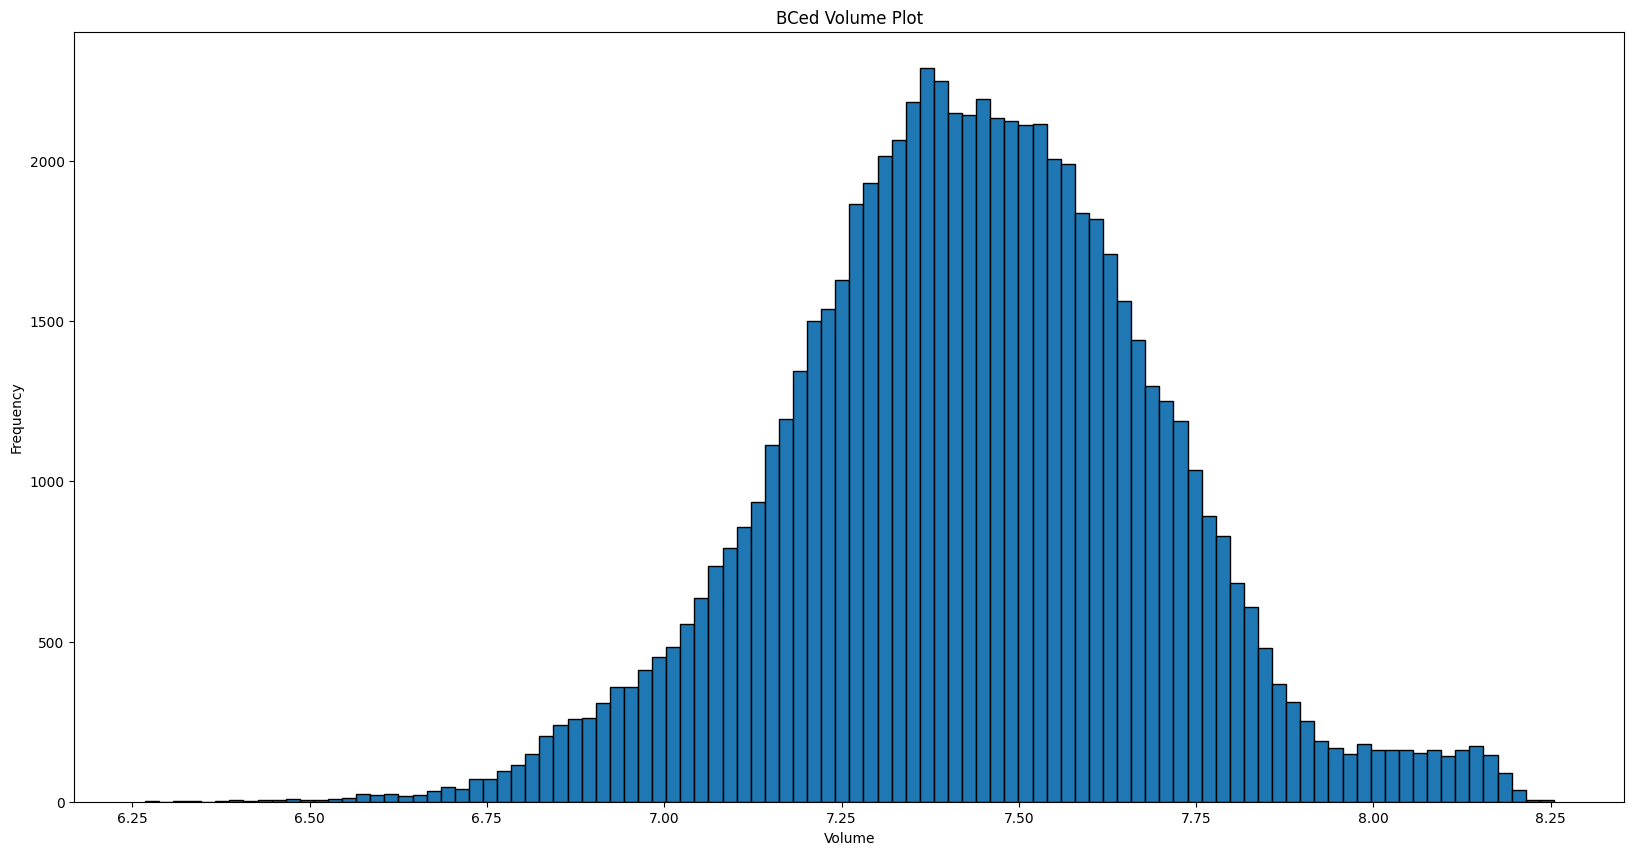

In [65]:
fig , ax = plt.subplots(figsize=(20,10))
plt.hist(dfx,bins = 100, edgecolor = "black", align = 'mid')
ax.set_title('BCed Volume Plot')
ax.set_xlabel('Volume')
ax.set_ylabel('Frequency')
plt.show()

As it shows, our new volume column is a semi-normal one; allowing us to use T-tests!

In [68]:
Group1x = coinhis[(coinhis['Name']=='Bitcoin')|(coinhis['Name']=='Ethereum')|(coinhis['Name']=='Tether USDt')]['BC']
Group1x

19817    8.152448
19818    8.140708
19819    8.174931
19820    8.126062
19821    8.098371
           ...   
20904    8.180984
20905    8.155843
20906    8.147476
20907    8.143195
20908    8.156516
Name: BC, Length: 1092, dtype: float64

In [70]:
Group2x = coinhis[(coinhis['Name']!='Bitcoin')&(coinhis['Name']!='Ethereum')&(coinhis['Name']!='Tether USDt')]['BC']
Group2x

0        7.550516
1        7.505150
2        7.555874
3        7.463683
4        7.449351
           ...   
70325    7.335872
70326    7.342866
70327    7.216781
70328    7.203031
70329    7.325660
Name: BC, Length: 69238, dtype: float64

Because of different sample sizes we will use a Welch's T-test.

In [71]:
sp.stats.ttest_ind(Group1x, Group2x, equal_var = False)

TtestResult(statistic=386.73523154483877, pvalue=0.0, df=2047.5633276617377)

Considering that, we will know that the two groups have different means.

Now to find the status of relation we can conduct a normal T-test.

Note: Normat T-test without the result of the Welch test has no value of induction, but when they are integrated; it has some context!

x: Others

y: BTC, ETH, USDT

H0 : μx < μy

H1 : μx >= μy

Statistic = (xbar - ybar) / sqrt(stdx^2/nx + stdy^2/ny)

Acceptence interval = (-inf, k[α])

If Statistic in Acceptence, Null hypothesis

In [72]:
xbar = Group2x.mean()
ybar = Group1x.mean()
stdx = Group2x.std()
stdy = Group1x.std()

In [73]:
S = (xbar - ybar) / np.sqrt((stdx**2/len(Group2x)) + (stdy**2/len(Group1x)))
A = (-np.inf, sp.stats.norm.ppf(.99))

In [74]:
S >= A[0] and S <= A[1]

True

It will be accepted that the mentioned coins has an strictly higher volume for 0.01 and any other higher significance level!

Additional Hypo test

In [75]:
weekends = coinhis[(coinhis['weekday']=='Saturday') | (coinhis['weekday']=='Sunday')]
weekends

,Name,timeOpen,timeClose,timeHigh,timeLow,open,high,low,close,volume,marketCap,DailyPrice,CirculatingSupply,Date,DailyChange,ChangeStatus,Price change,weekday,BC
4,Synthetix,2023-08-27T00:00:00.000Z,"""2023-08-27T23:59:59.999Z""","""2023-08-27T16:44:00.000Z""","""2023-08-27T00:00:00.000Z""",2.071464,2.148910,2.071464,2.107937,21101866.70,5.672910e+08,2.107937,2.691214e+08,2023-08-27,0.036344,Green,0.036474,Sunday,7.449351
5,Synthetix,2023-08-26T00:00:00.000Z,"""2023-08-26T23:59:59.999Z""","""2023-08-26T15:06:00.000Z""","""2023-08-26T00:55:00.000Z""",2.062422,2.082831,2.052110,2.071593,14078802.77,5.575099e+08,2.071593,2.691214e+08,2023-08-26,0.009235,Green,0.009171,Saturday,7.389698
11,Synthetix,2023-08-20T00:00:00.000Z,"""2023-08-20T23:59:59.999Z""","""2023-08-20T08:03:00.000Z""","""2023-08-20T23:18:00.000Z""",2.240442,2.258999,2.146165,2.149098,23446845.60,5.779989e+08,2.149098,2.689495e+08,2023-08-20,-0.091454,Red,-0.091343,Sunday,7.464434
12,Synthetix,2023-08-19T00:00:00.000Z,"""2023-08-19T23:59:59.999Z""","""2023-08-19T17:06:00.000Z""","""2023-08-19T07:12:00.000Z""",2.181628,2.245445,2.171883,2.240552,17961041.91,6.025954e+08,2.240552,2.689495e+08,2023-08-19,0.059077,Green,0.058925,Saturday,7.425928
18,Synthetix,2023-08-13T00:00:00.000Z,"""2023-08-13T23:59:59.999Z""","""2023-08-13T00:03:00.000Z""","""2023-08-13T16:56:00.000Z""",2.544359,2.545743,2.483328,2.500200,24866341.95,6.716466e+08,2.500200,2.686372e+08,2023-08-13,-0.043572,Red,-0.044159,Sunday,7.472768
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70314,Render,2022-09-17T00:00:00.000Z,"""2022-09-17T23:59:59.999Z""","""2022-09-17T10:56:00.000Z""","""2022-09-17T12:00:00.000Z""",0.462705,0.486955,0.457475,0.482442,17455987.67,1.224432e+08,0.482442,2.537989e+08,2022-09-17,0.019626,Green,0.019737,Saturday,7.421737
70320,Render,2022-09-11T00:00:00.000Z,"""2022-09-11T23:59:59.999Z""","""2022-09-11T01:13:00.000Z""","""2022-09-11T22:01:00.000Z""",0.582062,0.600198,0.553060,0.563641,13357205.24,1.430514e+08,0.563641,2.537989e+08,2022-09-11,-0.018598,Red,-0.018421,Sunday,7.381737
70321,Render,2022-09-10T00:00:00.000Z,"""2022-09-10T23:59:59.999Z""","""2022-09-10T08:04:00.000Z""","""2022-09-10T01:09:00.000Z""",0.564239,0.627566,0.560060,0.582239,24590018.45,1.477717e+08,0.582239,2.537989e+08,2022-09-10,0.017970,Green,0.018001,Saturday,7.471188
70327,Render,2022-09-04T00:00:00.000Z,"""2022-09-04T23:59:59.999Z""","""2022-09-04T13:07:00.000Z""","""2022-09-04T08:08:00.000Z""",0.509291,0.518565,0.497843,0.516505,4796503.94,1.310884e+08,0.516505,2.537989e+08,2022-09-04,0.007291,Green,0.007214,Sunday,7.216781


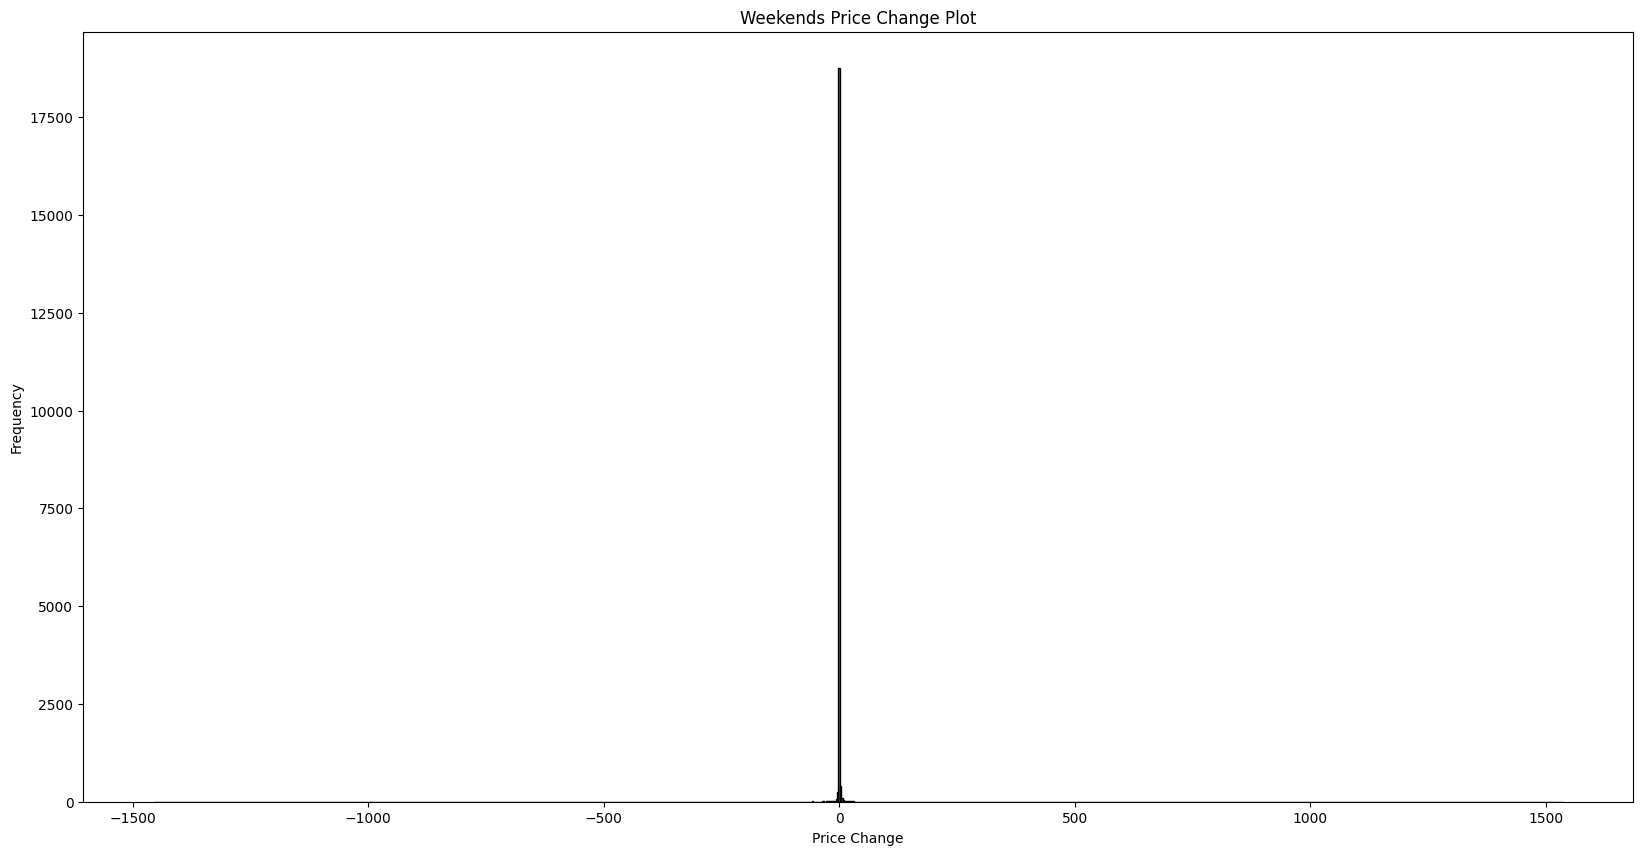

In [76]:
fig , ax = plt.subplots(figsize=(20,10))
plt.hist(weekends['Price change'], bins = 1000, edgecolor = "black", align = 'mid')
ax.set_title('Weekends Price Change Plot')
ax.set_xlabel('Price Change')
ax.set_ylabel('Frequency')
plt.show()

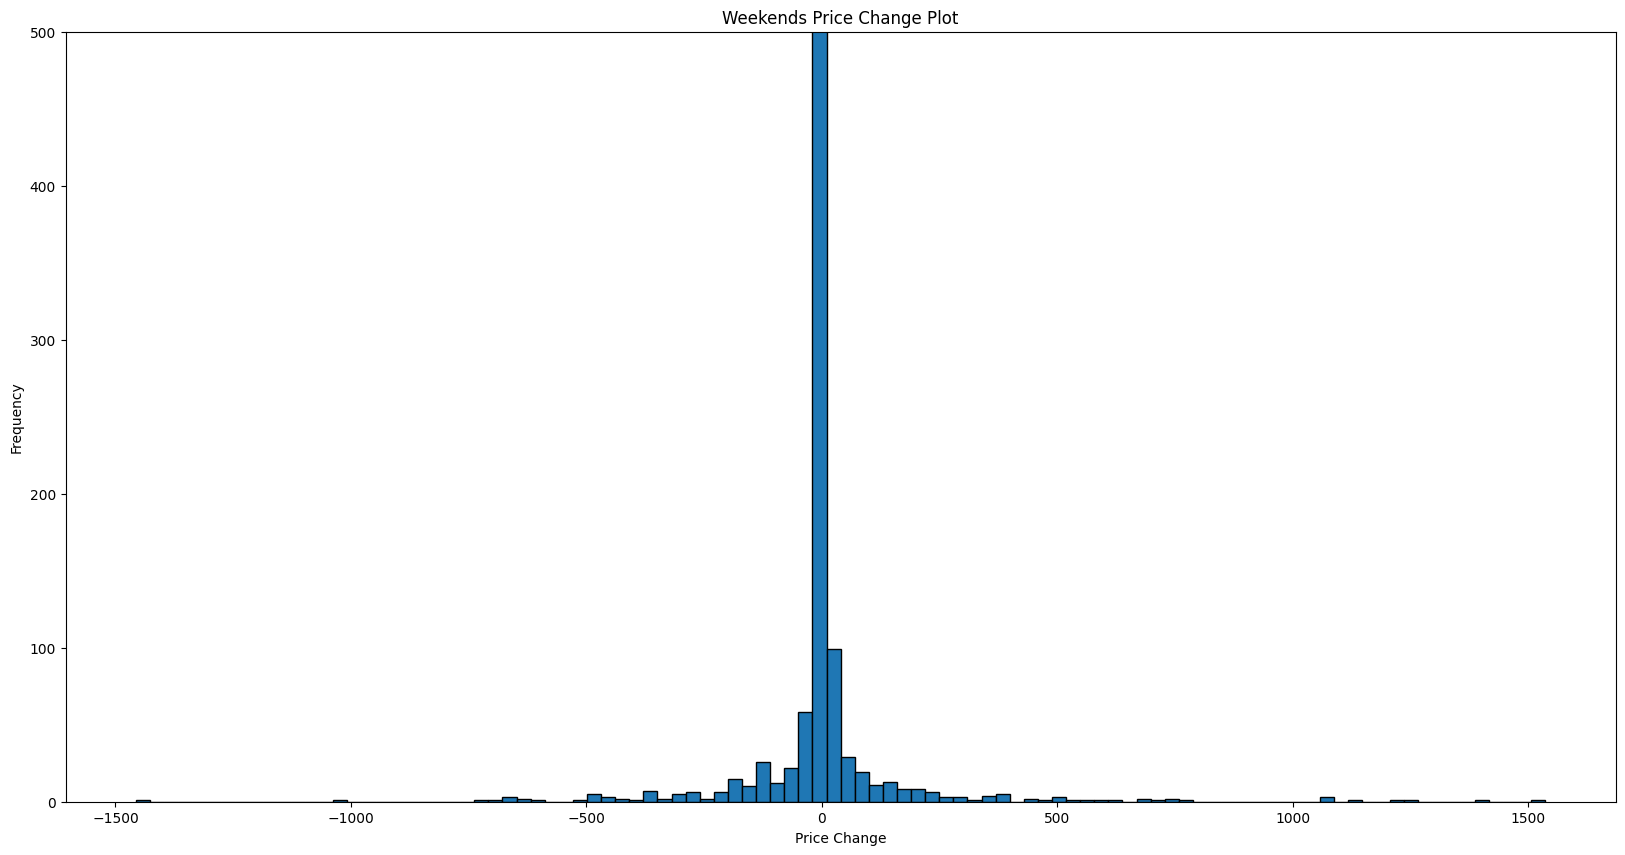

In [77]:
fig , ax = plt.subplots(figsize=(20,10))
plt.hist(weekends['Price change'], bins = 100, edgecolor = "black", align = 'mid')
ax.set_title('Weekends Price Change Plot')
ax.set_xlabel('Price Change')
ax.set_ylabel('Frequency')
ax.set_ylim(0,500)
plt.show()

In this plot, it seems our data is normal.

We will use further tests to determine that.

Shapiro Normality test:

In [78]:
from scipy.stats import shapiro
stat, p = shapiro(weekends['Price change'])
p

d:\Sharif University of Tech\Data\.venv\lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


0.0

The Shapiro test rejects normlity!

D'Agostino Normality test:

In [79]:
from scipy.stats import normaltest
stat, p = normaltest(weekends['Price change'])
p

0.0

The D'Agostino test rejects normlity too!

These test are valid for data around 5000 or less and in this case our data seems a very narrow normal distribution, therefore these tests won't be able to accept it's normality but our data isn't that far from being normal, being a Lepokurtic set!